# Machine Learning Part 1

#### 1. Import libraries and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Create inline

%matplotlib inline

In [3]:
#Import data
df_qb = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_QB.csv', encoding='latin1')
df_rb = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_RB.csv', encoding='latin1')
df_wr = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_WR.csv', encoding='latin1')
df_te = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_TE.csv', encoding='latin1')

#### 2. Regression analysis

#### QB

In [4]:
#View columns
df_qb.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'CMP', 'PASS ATT',
       'PCT', 'PASS YDS', 'Y/A', 'PASS TD', 'INT', 'SACKS', 'RUSH ATT',
       'RUSH YDS', 'RUSH TD', 'FL', 'G', 'FPTS'],
      dtype='object')

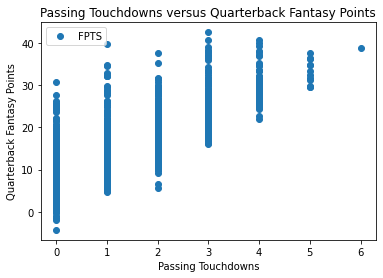

In [5]:
#Create scatterplot to show how variables plot against each other
df_qb.plot(x = 'PASS TD', y='FPTS',style='o') 
plt.title('Passing Touchdowns versus Quarterback Fantasy Points')  
plt.xlabel('Passing Touchdowns')  
plt.ylabel('Quarterback Fantasy Points')  
plt.show()

#### Hypothesis: Passing touchdowns will be a strong predictor of quarterback fantasy points

In [6]:
#Reshape the variables into NumPy arrays and put them into separate objects

A = df_qb['PASS TD'].values.reshape(-1,1)
B = df_qb['FPTS'].values.reshape(-1,1)

In [7]:
A

array([[5.],
       [3.],
       [4.],
       ...,
       [1.],
       [0.],
       [0.]])

In [8]:
B

array([[34.9],
       [31.5],
       [25.7],
       ...,
       [ 8.9],
       [ 8. ],
       [ 0.2]])

In [9]:
#Split data into a training set and a test set

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=0)

In [10]:
#Create  regression object

regression = LinearRegression()

In [11]:
#Fit regression object onto training set
regression.fit(A_train, B_train)

LinearRegression()

In [12]:
#Predict quarterback fantasy points using passing touchdowns
B_predicted = regression.predict(A_test)

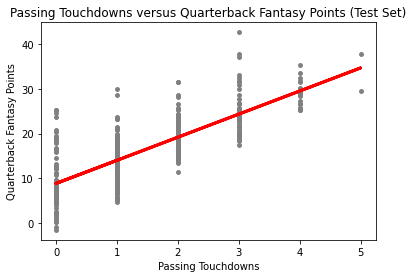

In [13]:
#Create plot that shows the regression line from the model on  test set

QB_plot_test = plt
QB_plot_test.scatter(A_test, B_test, color='gray', s = 15)
QB_plot_test.plot(A_test, B_predicted, color='red', linewidth =3)
QB_plot_test.title('Passing Touchdowns versus Quarterback Fantasy Points (Test Set)')
QB_plot_test.xlabel('Passing Touchdowns')
QB_plot_test.ylabel('Quarterback Fantasy Points')
QB_plot_test.show()

#### Interpretation: Strong, positive correlation between passing touchdowns and quarterback fantasy points

In [14]:
#Create objects that contain model summary statistics

rmse = mean_squared_error(B_test, B_predicted) 
r2 = r2_score(B_test, B_predicted) 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.15082594]]
Mean squared error:  24.726259976578007
R2 score:  0.5804777266313139


In [15]:
B_predicted

array([[14.0328499 ],
       [ 8.88202396],
       [24.33450177],
       [19.18367583],
       [ 8.88202396],
       [14.0328499 ],
       [14.0328499 ],
       [19.18367583],
       [24.33450177],
       [14.0328499 ],
       [24.33450177],
       [29.48532771],
       [24.33450177],
       [ 8.88202396],
       [14.0328499 ],
       [14.0328499 ],
       [24.33450177],
       [14.0328499 ],
       [14.0328499 ],
       [14.0328499 ],
       [19.18367583],
       [14.0328499 ],
       [14.0328499 ],
       [14.0328499 ],
       [14.0328499 ],
       [19.18367583],
       [24.33450177],
       [14.0328499 ],
       [ 8.88202396],
       [14.0328499 ],
       [19.18367583],
       [ 8.88202396],
       [ 8.88202396],
       [19.18367583],
       [ 8.88202396],
       [24.33450177],
       [14.0328499 ],
       [29.48532771],
       [19.18367583],
       [14.0328499 ],
       [ 8.88202396],
       [14.0328499 ],
       [14.0328499 ],
       [14.0328499 ],
       [24.33450177],
       [29

In [16]:
#Create dataframe comparing actual and predicted values of quarterback fantasy points
QB_data = pd.DataFrame({'Actual': B_test.flatten(), 'Predicted': B_predicted.flatten()})
QB_data.head(30)

,Actual,Predicted
0,13.6,14.032850
1,25.3,8.882024
2,17.5,24.334502
3,16.2,19.183676
4,5.6,8.882024
5,18.4,14.032850
6,12.5,14.032850
7,20.9,19.183676
8,22.9,24.334502
9,12.0,14.032850


#### Thoughts: Model perfromed well -- likely would perform stronger examining total touchdowns (passing and rushing combined)

#### Potential biases: Rookies with too small of a sample size are not included in the study
#### Veterans at the end of their careers may only get their latter years included in the study
#### The NFL game is different on a yearly basis (offenses adjust, defenses adjust, rules are changed) -- 2022 is on pace to be the lowest scoring season in years

#### RB

In [17]:
#View columns
df_rb.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'ATT', 'RUSH YDS',
       'Y/A', 'LG', '20+', 'RUSH TD', 'REC', 'TGT', 'REC YDS', 'Y/R', 'REC TD',
       'FL', 'G', 'Zero PPR', 'Half PPR', 'One PPR', 'Unnamed: 20'],
      dtype='object')

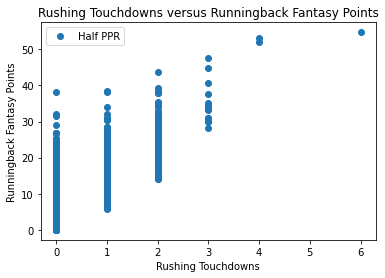

In [18]:
#Create scatterplot to show how variables plot against each other
df_rb.plot(x = 'RUSH TD', y='Half PPR',style='o') 
plt.title('Rushing Touchdowns versus Runningback Fantasy Points')  
plt.xlabel('Rushing Touchdowns')  
plt.ylabel('Runningback Fantasy Points')  
plt.show()

#### Hypothesis: Rushing touchdowns will be a strong predictor of runningback fantasy points

In [19]:
#Reshape the variables into NumPy arrays and put them into separate objects

C = df_rb['RUSH TD'].values.reshape(-1,1)
D = df_rb['Half PPR'].values.reshape(-1,1)

In [20]:
C

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [21]:
D

array([[28.9],
       [38.2],
       [ 3. ],
       ...,
       [18.8],
       [30.4],
       [16.6]])

In [22]:
#Split data into a training set and a test set

C_train, C_test, D_train, D_test = train_test_split(C, D, test_size=0.3, random_state=0)

In [23]:
#Create  regression object

regression = LinearRegression()

In [24]:
#Fit regression object onto training set
regression.fit(C_train, D_train)

LinearRegression()

In [25]:
#Predict runningback fantasy points using rushing touchdowns
D_predicted = regression.predict(C_test)

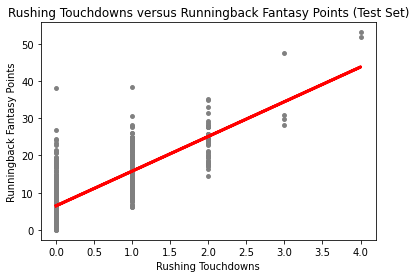

In [26]:
#Create plot that shows the regression line from the model on  test set

RB_plot_test = plt
RB_plot_test.scatter(C_test, D_test, color='gray', s = 15)
RB_plot_test.plot(C_test, D_predicted, color='red', linewidth =3)
RB_plot_test.title('Rushing Touchdowns versus Runningback Fantasy Points (Test Set)')
RB_plot_test.xlabel('Rushing Touchdowns')
RB_plot_test.ylabel('Runningback Fantasy Points')
RB_plot_test.show()

#### Interpretation: Strong, positive correlation between rushing touchdowns and runningback fantasy points

In [27]:
#Create objects that contain model summary statistics

rmse = mean_squared_error(D_test, D_predicted) 
r2 = r2_score(D_test, D_predicted) 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.31894914]]
Mean squared error:  28.77834947549229
R2 score:  0.5370214378956801


In [28]:
D_predicted

array([[ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [15.80589775],
       [ 6.48694861],
       [15.80589775],
       [ 6.48694861],
       [ 6.48694861],
       [15.80589775],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [25.12484689],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [15.80589775],
       [15.80589775],
       [ 6.48694861],
       [15.80589775],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [15.80589775],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [ 6.48694861],
       [15.80589775],
       [ 6.48694861],
       [15.80589775],
       [15.80589775],
       [25.12484689],
       [ 6.48694861],
       [15.80589775],
       [15.80589775],
       [ 6.48694861],
       [15

In [29]:
#Create dataframe comparing actual and predicted values of runningback fantasy points
RB_data = pd.DataFrame({'Actual': D_test.flatten(), 'Predicted': D_predicted.flatten()})
RB_data.head(30)

,Actual,Predicted
0,8.7,6.486949
1,1.4,6.486949
2,18.1,6.486949
3,13.3,15.805898
4,3.1,6.486949
5,19.7,15.805898
6,1.9,6.486949
7,12.7,6.486949
8,14.7,15.805898
9,5.6,6.486949


#### Thoughts: Model perfromed well, similar to quarterback model -- likely would perform stronger examining total touchdowns (rushing and receiving combined)

#### Potential biases: Rookies with too small of a sample size are not included in the study
#### Veterans at the end of their careers may only get their latter years included in the study
#### The NFL game is different on a yearly basis (offenses adjust, defenses adjust, rules are changed) -- 2022 is on pace to be the lowest scoring season in years

#### WR

In [30]:
#View columns
df_wr.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'REC', 'TGT', 'REC YDS',
       'Y/R', 'LG', '20+', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL', 'G',
       'Zero PPR', 'Half PPR', 'One PPR'],
      dtype='object')

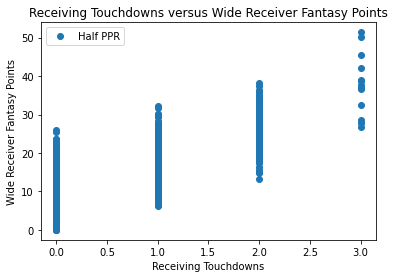

In [31]:
#Create scatterplot to show how variables plot against each other
df_wr.plot(x = 'REC TD', y='Half PPR',style='o') 
plt.title('Receiving Touchdowns versus Wide Receiver Fantasy Points')  
plt.xlabel('Receiving Touchdowns')  
plt.ylabel('Wide Receiver Fantasy Points')  
plt.show()

#### Hypothesis: Receiving touchdowns will be a strong predictor of wide receiver fantasy points

In [32]:
#Reshape the variables into NumPy arrays and put them into separate objects

E = df_wr['REC TD'].values.reshape(-1,1)
F = df_wr['Half PPR'].values.reshape(-1,1)

In [33]:
E

array([[2],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [34]:
F

array([[34.9],
       [25.1],
       [23.9],
       ...,
       [ 1.1],
       [ 1.5],
       [ 0.8]])

In [35]:
#Split data into a training set and a test set

E_train, E_test, F_train, F_test = train_test_split(E, F, test_size=0.3, random_state=0)

In [36]:
#Create  regression object

regression = LinearRegression()

In [37]:
#Fit regression object onto training set
regression.fit(E_train, F_train)

LinearRegression()

In [38]:
#Predict wide receiver fantasy points using receiving touchdowns
F_predicted = regression.predict(E_test)

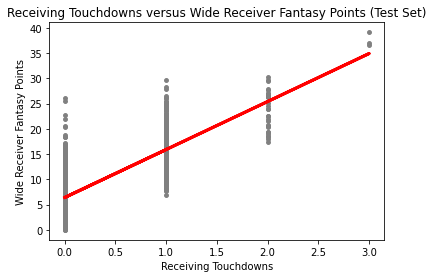

In [39]:
#Create plot that shows the regression line from the model on  test set

WR_plot_test = plt
WR_plot_test.scatter(E_test, F_test, color='gray', s = 15)
WR_plot_test.plot(E_test, F_predicted, color='red', linewidth =3)
WR_plot_test.title('Receiving Touchdowns versus Wide Receiver Fantasy Points (Test Set)')
WR_plot_test.xlabel('Receiving Touchdowns')
WR_plot_test.ylabel('Wide Receiver Fantasy Points')
WR_plot_test.show()

#### Interpretation: Strong, positive correlation between receiving touchdowns and wide receiver fantasy points

In [40]:
#Create objects that contain model summary statistics

rmse = mean_squared_error(F_test, F_predicted) 
r2 = r2_score(F_test, F_predicted) 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.49273431]]
Mean squared error:  18.547290552961375
R2 score:  0.5908951884898379


In [41]:
F_predicted

array([[15.90177133],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [15.90177133],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [25.39450563],
       [ 6.40903702],
       [15.90177133],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [25.39450563],
       [15.90177133],
       [ 6.40903702],
       [ 6.40903702],
       [25.39450563],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [15.90177133],
       [15.90177133],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [ 6.40903702],
       [15.90177133],
       [ 6.40903702],
       [ 6

In [42]:
#Create dataframe comparing actual and predicted values of wide receiver fantasy points
WR_data = pd.DataFrame({'Actual': F_test.flatten(), 'Predicted': F_predicted.flatten()})
WR_data.head(30)

,Actual,Predicted
0,17.2,15.901771
1,5.3,6.409037
2,8.0,6.409037
3,5.1,6.409037
4,10.9,6.409037
5,1.7,6.409037
6,1.1,6.409037
7,12.4,15.901771
8,5.0,6.409037
9,2.5,6.409037


#### Thoughts: Model perfromed well, similar to quarterback and runningback models -- better than I would have thought given wide receivers score at a lower rate than quarterbacks and runningbacks

#### Potential biases: Rookies with too small of a sample size are not included in the study
#### Veterans at the end of their careers may only get their latter years included in the study
#### The NFL game is different on a yearly basis (offenses adjust, defenses adjust, rules are changed) -- 2022 is on pace to be the lowest scoring season in years

#### TE

In [43]:
#View columns
df_te.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'REC', 'TGT', 'REC YDS',
       'Y/R', 'LG', '20+', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL', 'G',
       'Zero PPR', 'Half PPR', 'One PPR'],
      dtype='object')

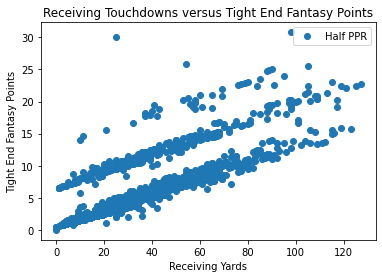

In [44]:
#Create scatterplot to show how variables plot against each other
df_te.plot(x = 'REC YDS', y='Half PPR',style='o') 
plt.title('Receiving Touchdowns versus Tight End Fantasy Points')  
plt.xlabel('Receiving Yards')  
plt.ylabel('Tight End Fantasy Points')  
plt.show()

#### Hypothesis: Receiving touchdowns will be a strong predictor of tight end fantasy points

In [45]:
#Reshape the variables into NumPy arrays and put them into separate objects

G = df_te['REC YDS'].values.reshape(-1,1)
H = df_te['Half PPR'].values.reshape(-1,1)

In [46]:
G

array([[  0],
       [  0],
       [  0],
       ...,
       [123],
       [125],
       [127]], dtype=int64)

In [47]:
H

array([[ 0.4],
       [ 0. ],
       [ 0.5],
       ...,
       [15.8],
       [22.5],
       [22.7]])

In [57]:
#Split data into a training set and a test set

G_train, G_test, H_train, H_test = train_test_split(G, H, test_size=0.3, random_state=0)

In [58]:
#Create  regression object

regression = LinearRegression()

In [59]:
#Fit regression object onto training set
regression.fit(G_train, H_train)

LinearRegression()

In [60]:
#Predict tight end fantasy points using receiving touchdowns
H_predicted = regression.predict(G_test)

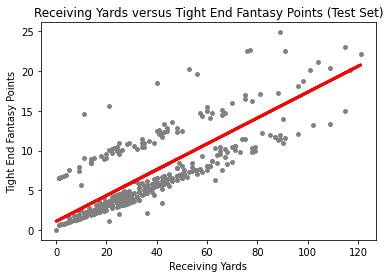

In [61]:
#Create plot that shows the regression line from the model on  test set

TE_plot_test = plt
TE_plot_test.scatter(G_test, H_test, color='gray', s = 15)
TE_plot_test.plot(G_test, H_predicted, color='red', linewidth =3)
TE_plot_test.title('Receiving Yards versus Tight End Fantasy Points (Test Set)')
TE_plot_test.xlabel('Receiving Yards')
TE_plot_test.ylabel('Tight End Fantasy Points')
TE_plot_test.show()

#### Interpretation: Strong, positive correlation between receiving touchdowns and tight end fantasy points but not accurate -- we see separate trend lines form around 0, 6, and 12 points – this is likely due to the impact scoring a touchdown has on fantasy scoring, as a touchdown is worth six points

In [62]:
#Create objects that contain model summary statistics

rmse = mean_squared_error(H_test, H_predicted) 
r2 = r2_score(H_test, H_predicted) 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16271479]]
Mean squared error:  8.780672444438329
R2 score:  0.6148012116889237


In [63]:
H_predicted

array([[ 8.40679014],
       [ 5.6406387 ],
       [ 8.89493451],
       [ 8.89493451],
       [18.00696277],
       [11.17294158],
       [ 7.59321619],
       [ 3.68806122],
       [ 4.66434996],
       [ 4.98977954],
       [ 6.45421266],
       [10.19665283],
       [17.68153319],
       [11.82380074],
       [ 8.24407535],
       [ 6.94235703],
       [ 5.15249433],
       [ 3.36263164],
       [ 6.45421266],
       [13.28823385],
       [12.63737469],
       [ 2.22362811],
       [10.52208242],
       [ 3.52534643],
       [20.12225505],
       [17.03067403],
       [ 7.75593098],
       [11.33565637],
       [13.45094864],
       [ 5.96606829],
       [ 1.57276895],
       [ 7.4305014 ],
       [ 3.19991685],
       [15.24081134],
       [ 9.54579367],
       [ 7.91864577],
       [ 7.75593098],
       [ 8.08136056],
       [ 1.57276895],
       [ 2.06091332],
       [ 7.26778661],
       [ 3.36263164],
       [ 7.10507182],
       [16.70524445],
       [ 8.89493451],
       [13

In [64]:
#Create dataframe comparing actual and predicted values of tight end fantasy points
TE_data = pd.DataFrame({'Actual': H_test.flatten(), 'Predicted': H_predicted.flatten()})
TE_data.head(30)

,Actual,Predicted
0,6.5,8.406790
1,3.8,5.640639
2,6.8,8.894935
3,6.8,8.894935
4,21.2,18.006963
5,8.7,11.172942
6,12.5,7.593216
7,3.1,3.688061
8,2.7,4.664350
9,3.4,4.989780


#### Thoughts: Model perfromed well, the best of all four models -- this makes sense as tight ends receive the least amount of usage and thus their fantasy scores should be more driven by touchdowns

#### Potential biases: Rookies with too small of a sample size are not included in the study
#### Veterans at the end of their careers may only get their latter years included in the study
#### The NFL game is different on a yearly basis (offenses adjust, defenses adjust, rules are changed) -- 2022 is on pace to be the lowest scoring season in years